In [50]:
import os, sys
import numpy as np

from scipy.signal import get_window, fftconvolve, oaconvolve
from scipy.fftpack import fft
import librosa

from math import floor
import matplotlib.pyplot as plt
%matplotlib inline


import IPython.display as ipd

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
#input file from workspace directory
input_file = "/content/drive/MyDrive/Schubert： Wandrers Nachtlied, Op. 4, D. 224.wav"

In [ ]:
#sound reading and displaying
x, fs = librosa.load(input_file, sr=44100)
ipd.display(ipd.Audio(data=x, rate=fs))

In [ ]:
#sound reading and displaying
x = x[44100*72:-44100*6]
ipd.display(ipd.Audio(data=x, rate=fs))

In [ ]:
#Array preprocessing
M = len(x)
hM1 = int(floor((M+1)/2))
hM2 = int(floor(M/2))
dftbuffer = np.zeros(M)
dftbuffer[:hM1] = x[hM2:]
dftbuffer[-hM2:] = x[:hM2]

#fft computation
X = fft(x)
#fft size
N = X.size

### Signal and spectra plotting


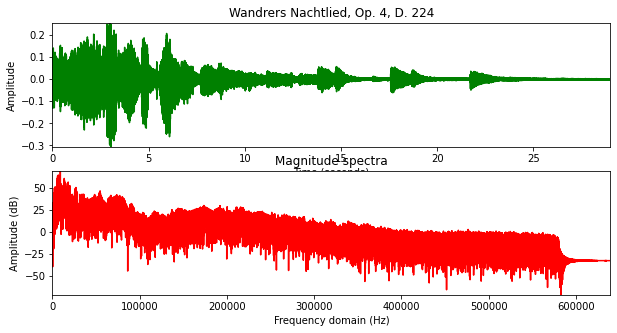

In [ ]:
#Setting figure size
plt.figure(figsize=(10, 5))

#Plotting input sound (x-axis in sec)
plt.subplot(2,1,1)
plt.plot(np.arange(N)/float(fs), x, 'g')
plt.axis([0, N/float(fs), min(x), max(x)])
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Wandrers Nachtlied, Op. 4, D. 224')
plt.autoscale(tight=True)

#Plotting magnitude spectra (x-axis in Hz)
plt.subplot(2,1,2)
plt.plot(np.real(20*np.log10(np.abs(X[:int(M/2)+1]))),'r', lw=1.5)
plt.xlabel('Frequency domain (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Magnitude spectra')
plt.autoscale(tight=True)

plt.show()